<h1>Airline Passenger Satisfaction Classification<h1>
<h4> Authors: Wenyi Zhao, Xi(Celine) Zhang <h4>

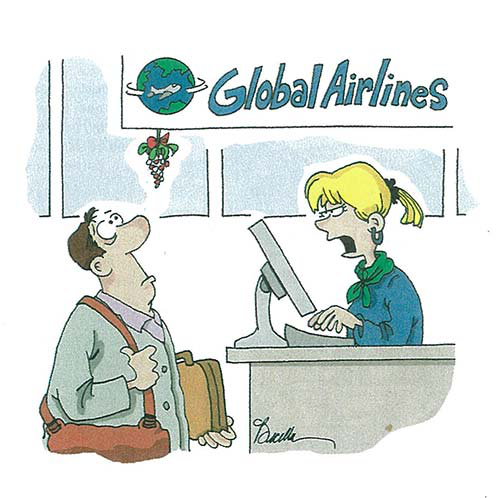

In [111]:
from PIL import Image
pic = Image.open("Mistletoe.jpg")
pic

<h2> Context <h2>
<h4>We are using the Kaggle dataset of Airline Passenger Satisfaction. According to our data overview, this dataset is collected from an US airline with survey. The airline asked their Customer to answer survey questions mainly in a likert-scale(ranged from 0 to 5, with 0 indicating the lowest satisfaction, and 5 indicating the highest satisfaction).


(dataset source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)<h4>

<h2> Task <h2>

<h4>1. Train a binary classifier for airline passenger satisfaction using supervised machine learning<h4>
<h4>2. Predict satisfaction: satisfied OR neutral satisfaction/dissatisfied<h4>
<h4>3. Airline satisfaction features evaluation


<h1>Roadmap<h1>
<h2>Step 1: Data Overview<h2>
<h4>This is the first step of our project, we will take a brief outlook of the whole data set(mainly for knowing what variables are included and what types of variables they are) and obtain a direction for data cleaning.<h4>
<h4> Responsible member: Celine<h4>
<h2>Step 2: Data cleaning I<h2>
<h4>We will deal with null data and unnecessary data for this step.<h4>
<h4> Responsible member: Celine<h4>
<h2>Step 3: Data analysis & visualization<h2>
<h4>In this step, we split and arrange the dataset for analyzing two kinds of variables: categorical variables and numerical variables. We will look into characteristics of categories through pie charts and bar graphs; And we will look into correlations between each numerical variables through heat maps and scatterplots. In particular, because many categorical variables are collected in a likert-scale of satisfaction, we are able to intuitively perceive the general satisfaction pattern for each segemented service in a flight. Also, for categories such as gender and types of travel, pie charts will allow us to capture the basic characteristics of the airline. <h4>
<h4> Responsible member: Numerical: Celine, Categorical: Wenyi<h4>
<h2>Step 4: Data cleaning II<h2>
<h4>Different from the previous data cleaning section, this section is to ensure a consistency in all variables' data for fitting in models. For achieving this, we will do filling missing values, checking outliers by looking at each numerical variable, processing standardizations, assigning binary categorical variables values of 0 and 1, and converting categorical variable into dummy variables. Since we are using supervised machine learning algorithm, we will also ensure that all data are well splitted into labeled training and testing data.<h4>
<h4> Responsible member: Wenyi<h4>
<h2>Step 5: Supervised Machine learning: train a binary classifier<h2>
<h4>According to Nvidia Data Science Discovery, Supervised machine learning "uses algorithms to train a model to find patterns in a dataset with labels and features and then uses the trained model to predict the labels on a new dataset’s features".<h4>
<h3>1. Random Forest Algorithm<h3>
<h4>mechanism: it constructs multiple deicision trees for its training time. Specifically, a random forest classifier generates class outputs selected my most trees.
<h4> Responsible member: Wenyi<h4>
<h3>2. KNN(K-Nearest Neighbors) Algorithm<h3>
<h4>mechanism: it "assumes that similar things exist in close proximity. In other words, similar things are near to each other"(Harrison).
<h4> Responsible member: Celine<h4>
<h3>3. XGBoost(Extreme Gradient Boosting) Algorithm<h3>
<h4>mechanism: According to Nvidia Data Science Discovery, it combines supervised machine learning, decision trees, ensemble learning, and gradient boosting altogether, characterized by Gradient Boosting Decision Trees (GBDT), "a decision tree ensemble learning algorithm similar to random forest, for classification and regression. Ensemble learning algorithms combine multiple machine learning algorithms to obtain a better model". To train the model, we convert our target value to 0 and 1.<h4>
<h4> Responsible member: Wenyi<h4>
<h3>4. Model Comparison<h3>
<h4> Responsible member: Wenyi<h4>
<h2>Step6: Conclusion and Error Analysis<h2>
<h4> Responsible member: Celine &Wenyi<h4>

### 1. DATA OVERVIEW

In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score

In [3]:
# read training data and testing data to pandas dataframe and combine them to process together
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
# add the 'ind' column to indicate whether they belongs to test or train file originally, facilitating later splitting
data = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [4]:
# check the shape of data
data.shape

(129880, 26)

In [5]:
# check the head of data
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,ind
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,test
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,test
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,test
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,3,1,4,0,6.0,satisfied,test
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,test


In [6]:
# get a concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [7]:
# See the rows of 20,21,22,23
unseen = [20,21,22,23]
data.iloc[:,unseen].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Inflight service            129880 non-null  int64  
 1   Cleanliness                 129880 non-null  int64  
 2   Departure Delay in Minutes  129880 non-null  int64  
 3   Arrival Delay in Minutes    129487 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 5.0 MB


### 2. DATA CLEANING I

According to the summary, we find that:
1. The column “Arrival Delay in Minutes” has missing values in amounts(129880-129487) 393.

2. According to their column names “Unnamed:0” and “id” , the first two columns have no meanings and have little contribution to our analysis, thus we drop them.

3. With a careful review of the database, we find that many columns’ original dtype is ‘int64’, but are indeed containing only rating values from 0 to 5. For example, ‘Inflight wifi service” indicating that the data was collected through a rating questionnaire with the lowest satisfaction level of 0 and the highest satisfaction level of 5. We change them to categorical variables. Also, we change those typed as ‘object’ to ‘category’.

In [8]:
# Drop Unnamed and id
data = data.drop(data.columns[[0,1]], axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [10]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
# Convert to categorical dtype
cat_col_idx = [0,1,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
data.iloc[:,cat_col_idx] = data.iloc[:,cat_col_idx].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding           

### 3. DATA ANALYSIS & VISUALIZATION

The next step is to have a deeper investigation of those variables. Worth noticing, the ‘top ‘ row shows the most frequent appearing value of each categorical variable.

In [13]:
# Describe categorical variables
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969


In [14]:
# Describe numerical variables
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


([<matplotlib.patches.Wedge at 0x7f77b9d177f0>,
 [Text(-0.22488421808296188, 1.0767669610724575, 'Neutral or dissatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'Satisfied')],
 [Text(-0.12266411895434283, 0.5873274333122495, '56.55%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.45%')])

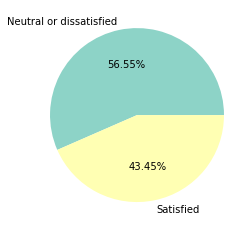

In [15]:
# Plot pie chart of the two classes (target value)
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Set3"), autopct = '%1.2f%%')

The above pie chart illustrates that more than half of passengers indicated a dissatisfaction or a neutral attitude towards their flight experiences. Overall, this dataset for binary classification is balanced.

#### Categorical Data Analysis

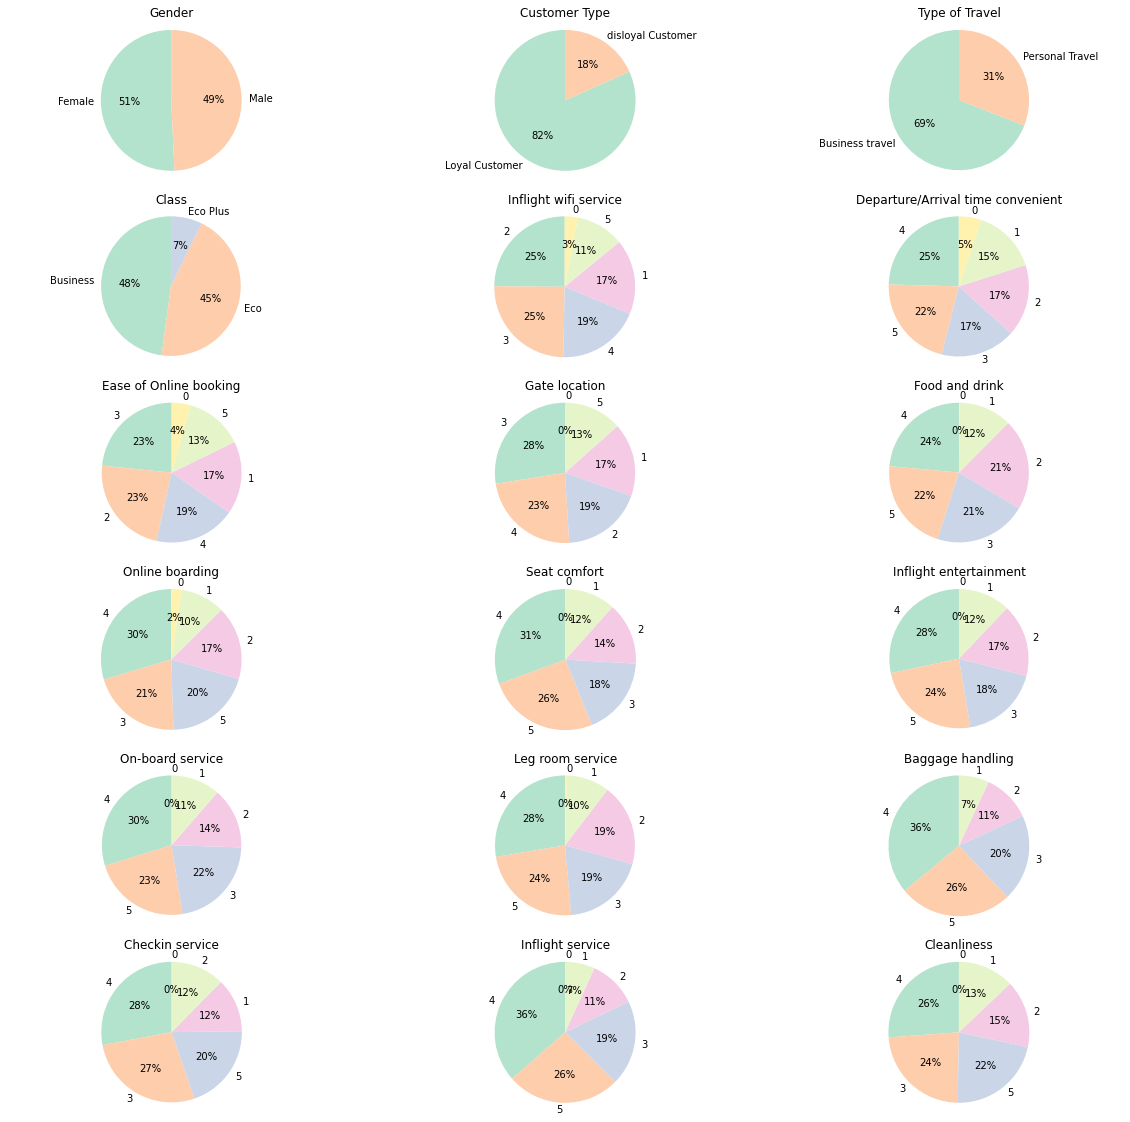

In [16]:
# Inspect the value proportion of each categorical variable
cat = data.iloc[:,cat_col_idx]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(cat):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Pastel2"), autopct = '%.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Now, with distinct color for each level of satisfaction, we can easily understand customer assessments toward every portion of the flight service.
For example:
1.this ariline did about 50% more business travel services.
2.inflight services are geenrally more satisfied(62% answers from 4 and 5 levels)

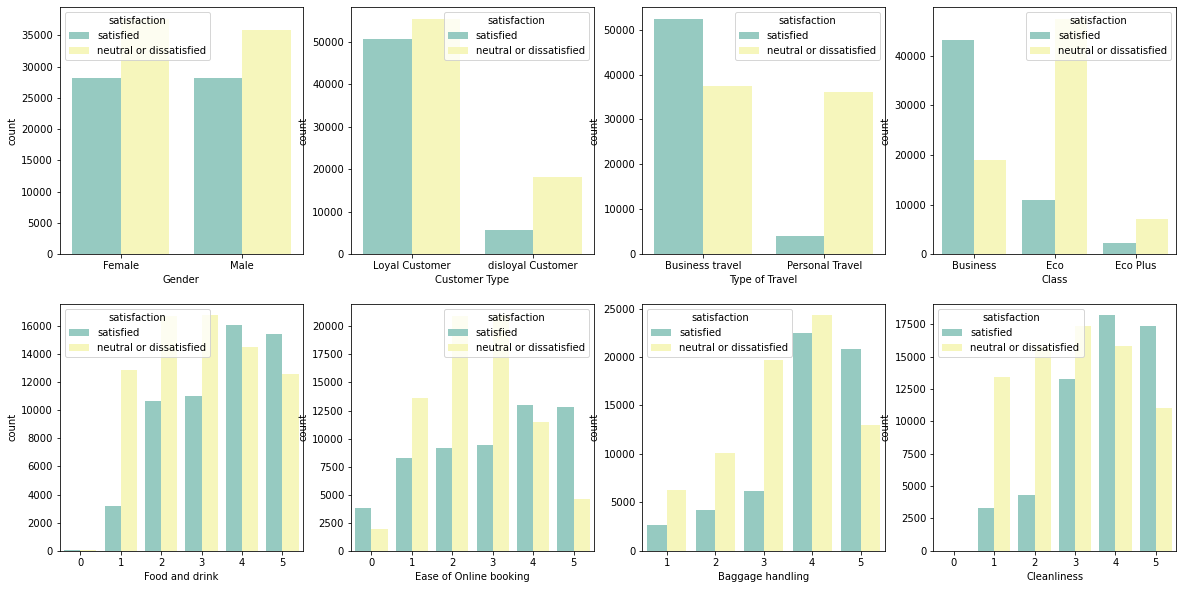

In [17]:
# Inspect the relation between some categorical value and the target value
# We think it is unnecessary to check all features
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
sns.countplot(x = 'Gender', data = data, hue= 'satisfaction', palette= 'Set3', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data, hue= 'satisfaction',  palette= 'Set3', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data, hue= 'satisfaction',  palette= 'Set3', ax = axes[0, 2]);
sns.countplot(x = 'Class', data = data, hue= 'satisfaction',  palette= 'Set3', ax = axes[0, 3]);
sns.countplot(x = 'Food and drink', data = data, hue= 'satisfaction',  palette= 'Set3', ax = axes[1, 0]);
sns.countplot(x = 'Ease of Online booking', data = data, hue= 'satisfaction',  palette= 'Set3', ax = axes[1, 1]);
sns.countplot(x = 'Baggage handling', data = data, hue= 'satisfaction',  palette= 'Set3', ax = axes[1, 2]);
sns.countplot(x = 'Cleanliness', data = data, hue= 'satisfaction',  palette= 'Set3', ax = axes[1, 3]);

We even want to know which area potentially is a significant influencing factor to the satisfaction level. These bar graphs showing above indicating that those experienced with a personal travel have a remarkable high level of dissatisfaction and neutral satisfaction. We would regard this as an implication of the need to improve the overall airline service, considering the similar amounts of people answering the ‘travel’ question  in business travel and personal travel categories.

The econ class passengers also have more reports of dissatisfaction and neutral satisfaction, saying more efforts on implementing econ class service.


#### Numerical Data Analysis

<AxesSubplot:>

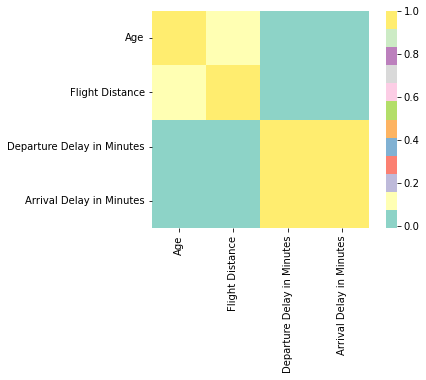

In [18]:
# check the correlation using heatmap and scatter plot
coorelation = data.corr()
sns.heatmap(coorelation, square = True, cmap = "Set3")


We can see from the heatmap that departure delay in minutes and arrival delay in minutes has a perfect positive correlation. In othe words, any amount of changes in departure delay in munutes leads to the exact same amount of changes in arrival delay in minutes. 

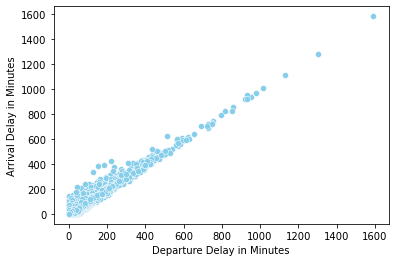

In [19]:
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = data, color = 'skyblue')
plt.show()

A more obvious pattern from scatterplot: An almost linear correlation between 'Departure delay in minutes' and 'Arrival delay in minutes', with a coefficient around 1.

Therefore, one of them will be dropped in the next Data Cleaning part.

### 4. DATA CLEANING II

#### Fill in missing value
As analyzed before, there are 393 missing value for "Arrival Delay in Minutes". Since we decide to drop one of the arrival delay and the departure delay, we will drop the "Arrival Delay in Minutes". 

In [20]:
data = data.drop('Arrival Delay in Minutes', axis = 1)

In [21]:
# Check if exist other null value in all columns
null_sum = data.isnull().sum()
null_sum

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
ind                                  0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding           

#### Check Outliers

Considering the factor of outlier, which can disrupt the effectiveness of the analyzing result, <mark style="background-color: lightblue"> we decide not to do any outlier disposal for this dataset's categorical variable.</mark> Because almost all categorical variables are in the likert-scale form that has a nature of reistricted 5-scale. And other categories such as 'class' and 'gender' also do not have outliers due to their nature and limited categories.

##### Processing numerical features

In [23]:
num_col = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

In [24]:
# Convert to float type
data[num_col] = data[num_col].astype('float')
data[num_col]

,Age,Flight Distance,Departure Delay in Minutes
0,52.0,160.0,50.0
1,36.0,2863.0,0.0
2,20.0,192.0,0.0
3,44.0,3377.0,0.0
4,49.0,1182.0,0.0
...,...,...,...
103899,23.0,192.0,3.0
103900,49.0,2347.0,0.0
103901,30.0,1995.0,7.0
103902,22.0,1000.0,0.0


In [25]:
# Check the current dtypes
data[num_col].dtypes

Age                           float64
Flight Distance               float64
Departure Delay in Minutes    float64
dtype: object

In [26]:
# Check again if there is missing value
data[num_col].isna().sum()

Age                           0
Flight Distance               0
Departure Delay in Minutes    0
dtype: int64

In [27]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713
std,15.119360,997.452477,38.071126
min,7.000000,31.000000,0.000000
25%,27.000000,414.000000,0.000000
50%,40.000000,844.000000,0.000000
75%,51.000000,1744.000000,12.000000
max,85.000000,4983.000000,1592.000000


##### Analyze Age

<AxesSubplot:xlabel='Age'>

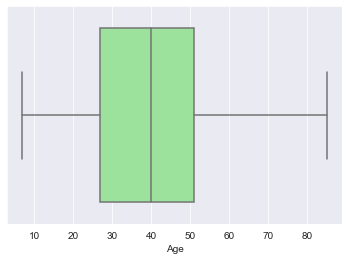

In [28]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data['Age'], orient='h', color='lightgreen')

In [29]:
# Check thresholds
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(27.0, 51.0, -9.0, 87.0)

<AxesSubplot:xlabel='Age', ylabel='Count'>

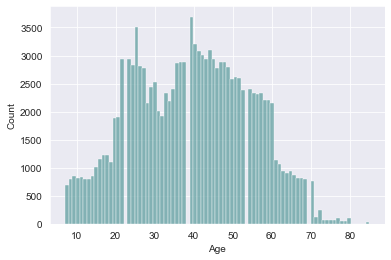

In [30]:
# check the distribution of "Age"
sns.histplot(data['Age'], color = 'cadetblue')

From the return value of "data.describe()" above, the min age is 7 and max age is 85. There is no need to drop outliers.

##### Analyze Flight Distance

<AxesSubplot:xlabel='Flight Distance'>

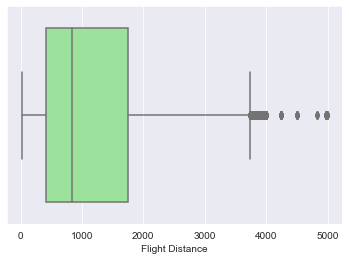

In [31]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data['Flight Distance'], orient='h', color='lightgreen')

In [32]:
# Check thresholds
Q1 = data['Flight Distance'].quantile(0.25)
Q3 = data['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(414.0, 1744.0, -1581.0, 3739.0)

In [33]:
# Drop outliers
data.drop(data[data['Flight Distance'] > 3739].index, inplace=True)
data.shape

(125899, 23)

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

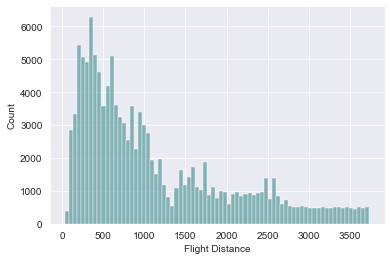

In [34]:
# check the new distribution of the "Flight Distance"
sns.histplot(data['Flight Distance'], color = 'cadetblue')

##### Departure Delay in Minutes

<AxesSubplot:xlabel='Departure Delay in Minutes'>

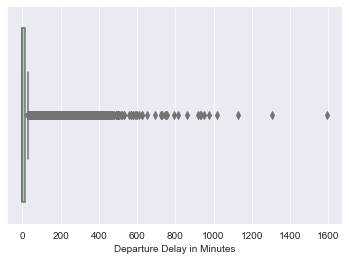

In [35]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data['Departure Delay in Minutes'], orient='h', color='lightgreen')

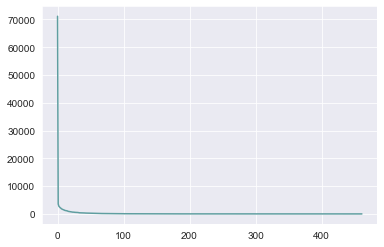

In [36]:
plt.plot(data['Departure Delay in Minutes'].value_counts().values, color = 'cadetblue')

It is surprising that the “Departure Delay in Minutes” variable has a such scattered pattern. We understand this situation as delay is an accidental event and is cause by various reasons. Considering the situation of severe weathers, a heavy rain can lasts for 30 minutes and can also last for a day. The minutes of delay can only be evaluated case-by-case.
To further confirm our explanation, we did a pyplot graph. This graph shows huge amounts of times for 0 minute delays(no delays), and a strongly contrasting small amounts of delays when x is not zero. A such result illustrate that delay is a small-chance event and is accidental. 

<mark style="background-color: lightblue"> Thus, we do not clean outliers for this variable. Becuase it no longer makes sense after cleaning.</mark>


In [37]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction', 'ind'],
      dtype='object')

In [38]:
# do standardization to ensure no redundant data and to do data integration
data_numerical = data[['Age', "Flight Distance", "Departure Delay in Minutes"]]

data_numerical

,Age,Flight Distance,Departure Delay in Minutes
0,52.0,160.0,50.0
1,36.0,2863.0,0.0
2,20.0,192.0,0.0
3,44.0,3377.0,0.0
4,49.0,1182.0,0.0
...,...,...,...
103899,23.0,192.0,3.0
103900,49.0,2347.0,0.0
103901,30.0,1995.0,7.0
103902,22.0,1000.0,0.0


In [39]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical

,Age,Flight Distance,Departure Delay in Minutes
0,0.834741,-1.052253,0.929362
1,-0.220161,1.881360,-0.386329
2,-1.275063,-1.017522,-0.386329
3,0.307290,2.439213,-0.386329
4,0.636947,0.056942,-0.386329
...,...,...,...
103899,-1.077269,-1.017522,-0.307387
103900,0.636947,1.321337,-0.386329
103901,-0.615749,0.939305,-0.202132
103902,-1.143200,-0.140586,-0.386329


In [40]:
data_cat = data.iloc[:,cat_col_idx]
data_cat

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Female,Loyal Customer,Business travel,Eco,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,Female,Loyal Customer,Business travel,Business,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,Male,disloyal Customer,Business travel,Eco,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,Male,Loyal Customer,Business travel,Business,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,Female,Loyal Customer,Business travel,Eco,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Male,Loyal Customer,Business travel,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Male,disloyal Customer,Business travel,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Female,disloyal Customer,Business travel,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [41]:
pd.options.mode.chained_assignment = None

**Below we assign 1 and 0 value to binary categorical variables**

In [42]:
data_cat['Customer Type'] = data_cat['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})

In [43]:
data_cat['Gender'] = data_cat['Gender'].map({'Male':1, 'Female':0})

In [44]:
data_cat['Type of Travel'] = data_cat['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

In [45]:
data_cat.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0,1,1,Eco,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,0,1,1,Business,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,1,0,1,Eco,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,1,1,1,Business,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,0,1,1,Eco,2,3,4,3,4,1,2,2,2,2,2,4,2,4


In [46]:
# Convert to int type
data_binary = data_cat.iloc[:,[0,1,2]]
data_binary = data_binary.astype('int64')
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125899 entries, 0 to 103903
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Gender          125899 non-null  int64
 1   Customer Type   125899 non-null  int64
 2   Type of Travel  125899 non-null  int64
dtypes: int64(3)
memory usage: 3.8 MB


**Get and preprocess non-binary categorical variables**

In [47]:
data_non_binary = data_cat.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
data_non_binary

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,Business,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,Eco,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,Business,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,Eco,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [48]:
# We will use the get_dummies function
data_non_binary = pd.get_dummies(data_non_binary)

In [49]:
# Each non-binary variable is assigned one binary column per category
data_non_binary

,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
103900,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
103901,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
103902,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [50]:
# Join processed numerical, binary and non_binary dataframe
# Get target data
target = pd.concat((data['satisfaction'],data['ind']), axis = 1)

In [51]:
# Get features data
ready_data = pd.concat((data_numerical, data_binary, data_non_binary, data['ind']), axis = 1)
ready_data

,Age,Flight Distance,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,...,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,ind
0,0.834741,-1.052253,0.929362,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,test
1,-0.220161,1.881360,-0.386329,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,test
2,-1.275063,-1.017522,-0.386329,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,test
3,0.307290,2.439213,-0.386329,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,test
4,0.636947,0.056942,-0.386329,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.077269,-1.017522,-0.307387,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,train
103900,0.636947,1.321337,-0.386329,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,train
103901,-0.615749,0.939305,-0.202132,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,train
103902,-1.143200,-0.140586,-0.386329,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,train


For all above portions, we focus on data processing and cleaning, the next portions wil be get data ready for models and apply models to data.

##### Splitting data into testing and training data

In [52]:
test, train = ready_data[ready_data["ind"].eq("test")], ready_data[ready_data["ind"].eq("train")]

In [53]:
# check test features shape
test.shape

(24838, 93)

In [54]:
# check train features shape
train.shape

(101061, 93)

In [55]:
# get target values of train and test data
target_test, target_train = target[target["ind"].eq("test")], target[target["ind"].eq("train")]

In [56]:
# drop the index "ind" column of each data
target_train.drop('ind', axis = 1, inplace = True)
target_test.drop('ind', axis = 1, inplace = True)
test.drop('ind', axis = 1, inplace = True)
train.drop('ind', axis = 1, inplace = True)

In [57]:
# check if dropped successfully
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101061 entries, 0 to 103903
Data columns (total 92 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Age                                  101061 non-null  float64
 1   Flight Distance                      101061 non-null  float64
 2   Departure Delay in Minutes           101061 non-null  float64
 3   Gender                               101061 non-null  int64  
 4   Customer Type                        101061 non-null  int64  
 5   Type of Travel                       101061 non-null  int64  
 6   Class_Business                       101061 non-null  uint8  
 7   Class_Eco                            101061 non-null  uint8  
 8   Class_Eco Plus                       101061 non-null  uint8  
 9   Inflight wifi service_0              101061 non-null  uint8  
 10  Inflight wifi service_1              101061 non-null  uint8  
 11  Inflight wifi

In [58]:
target_train.head()

,satisfaction
0,neutral or dissatisfied
1,neutral or dissatisfied
2,satisfied
3,neutral or dissatisfied
4,satisfied


### 5.Supervised Learning and Models

#### Model 1: **Random Forest Classifier**

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# creat a list to record the scores when exploring the random forest classifier
rfc_socres = []

In [61]:
# First use the default classifier, random_state = 42
rfc = RandomForestClassifier(random_state = 42)
# Although our target data only has one column, since the system always suggests using ".ravel()" function, we decide to do so
rfc.fit(train,target_train.values.ravel())
# Use score fucntion to see the performance
rfc.score(test, target_test.values.ravel())

0.9606651099122313

In [62]:
rfc_socres.append(rfc.score(test, target_test.values.ravel()))

In [63]:
# Increase the number of estimators to 500
rfc = RandomForestClassifier(n_estimators = 500, random_state = 42)
rfc.fit(train,target_train.values.ravel())
# Use score fucntion to see the performance
rfc.score(test, target_test.values.ravel())

0.9611482405990821

In [64]:
rfc_socres.append(rfc.score(test, target_test.values.ravel()))

In [65]:
# Try different parameters, especially increase the number of estimators to 1000
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(train,target_train.values.ravel())
# Use score fucntion to see the performance
rfc.score(test, target_test.values.ravel())

0.9616313712859328

In [66]:
rfc_socres.append(rfc.score(test, target_test.values.ravel()))

In [67]:
# Keep try different parameters, set criterion to entropy
rfc = RandomForestClassifier(n_estimators = 1000, criterion = "entropy", random_state = 42)
rfc.fit(train,target_train.values.ravel())
# Use score fucntion to see the performance
rfc.score(test, target_test.values.ravel())

0.9615105886142201

In [68]:
rfc_socres.append(rfc.score(test, target_test.values.ravel()))

In [69]:
# Keep try different parameters, set max_depth to 5
rfc = RandomForestClassifier(n_estimators = 1000, max_depth = 5, random_state = 42)
rfc.fit(train,target_train.values.ravel())
# Use score fucntion to see the performance
rfc.score(test, target_test.values.ravel())

0.9069570818906514

In [70]:
rfc_socres.append(rfc.score(test, target_test.values.ravel()))

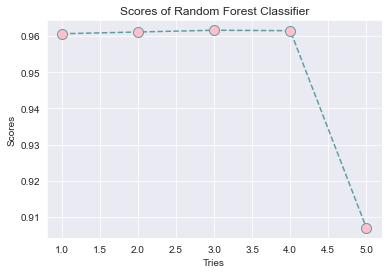

In [71]:
# plot a line chart to visualize the result of above tries
plt.plot(range(1,6, 1), rfc_socres, color='cadetblue', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Scores of Random Forest Classifier')
plt.xlabel('Tries')
plt.ylabel('Scores')
plt.show()

In [72]:
# After explore different parameters, we decide to use below model as our final Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(train,target_train.values.ravel())

RandomForestClassifier(n_estimators=1000, random_state=42)

In [73]:
# get prediction values in array
rfc_pred = rfc.predict(test)
rfc_pred

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

In [74]:
# transform target values to array
target_test.values.ravel()

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

In [75]:
# find the failed index
index = np.arange(0,24838)
fail_index_rfc = index[rfc_pred != target_test.values.ravel()]
len(fail_index_rfc)

953

In [76]:
#failed examples in the test data
# features
fail_rfc = test.iloc[fail_index_rfc]
# target values
fail_rfc["target class"] = target_test.iloc[fail_index_rfc]

In [77]:
# predict values
fail_rfc["predict class"] = rfc_pred[fail_index_rfc]

In [78]:
# observe the failed examples 
# We will do failed example analysis later 
fail_rfc

,Age,Flight Distance,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,...,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,target class,predict class
4,0.636947,0.056942,-0.386329,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,satisfied,neutral or dissatisfied
29,0.768809,-0.970854,-0.386329,1,1,1,0,1,0,0,...,1,0,0,0,0,0,1,0,neutral or dissatisfied,satisfied
31,1.098466,-0.891626,-0.386329,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,satisfied,neutral or dissatisfied
38,-0.483887,-0.355479,-0.386329,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,neutral or dissatisfied,satisfied
52,0.900672,-0.661538,0.061006,0,1,1,0,1,0,0,...,1,0,0,0,0,1,0,0,satisfied,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25764,0.307290,0.661464,-0.281073,0,1,1,0,1,0,0,...,1,0,0,0,0,1,0,0,neutral or dissatisfied,satisfied
25785,-0.022367,-0.541068,-0.386329,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,neutral or dissatisfied,satisfied
25869,-1.538788,0.228422,-0.386329,1,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,satisfied,neutral or dissatisfied
25930,-0.615749,1.771743,-0.386329,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,satisfied,neutral or dissatisfied


##### Feature Importance of Random Forest Classifier

feature_importances_ enable us to rank and plot every feature's importance relative to others.<br> If a feature has a high value, it will cast larger influences on the model that predicts variables. 

Significances of feature importances to our analysis:<br>
1/It helps us to undertstand our data better<br>
2/It assists with determining which feature contributes the most to the predicting ability of each model. 

Text(0.5, 0, 'Random Forest Classifier Feature Importance')

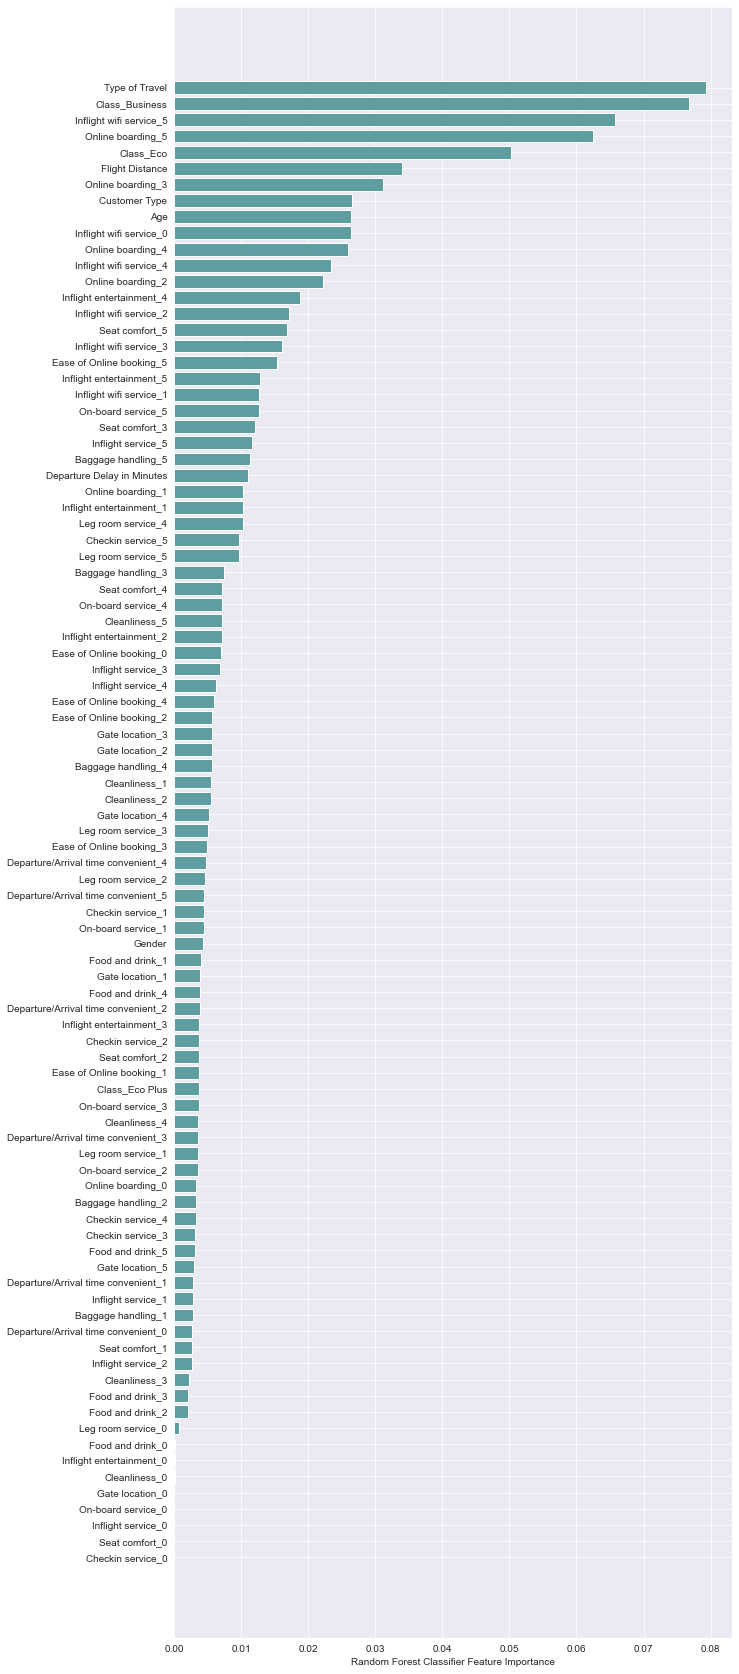

In [79]:
# Get feature importance and sort in descending order
importances = rfc.feature_importances_
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize = (10,30))
plt.barh(ready_data.columns[sorted_idx], rfc.feature_importances_[sorted_idx], color = 'cadetblue', )
plt.xlabel("Random Forest Classifier Feature Importance")

The most important feature of the RFC model is "Type of Travel", which could also be observed from previous bar chart.<br>Thus, the feature of "Type of Travel" influences the predictability of this random forest classifier the most, with a score sightly lower than 0.08.

#### Model 2: **K-nearest neighbors (kNN) method**

In [80]:
# Train the KNN Classifier
knn = KNeighborsClassifier()

# Frist try the 4 neighbors
knn.set_params(n_neighbors = 4)
knn.fit(train, target_train.values.ravel())

# First use mean to basically see the error
error_train = np.mean(target_train != knn.predict(train).reshape(101061,1))
error_test  = np.mean(target_test  != knn.predict(test).reshape(24838,1))

print('Training error: ', error_train)
print('Testing error: ', error_test)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Training error:  satisfaction    0.04427
dtype: float64
Testing error:  satisfaction    0.065021
dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


##### Test different K values

In [81]:
# Create a list to record accuracy of each parameter
accuracy = []
# Try "n_neighbors" ranges from 1 to 14
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train, target_train.values.ravel())
    pred_i = knn.predict(test).reshape(24838,1)
    accuracy_i = accuracy_score(target_test, pred_i)
    print(accuracy_i)
    accuracy.append(accuracy_i)

0.9208068282470409
0.9255978742249779
0.9328045736371688
0.9349786617279974
0.9353812706337065
0.9373943151622514
0.937555358724535
0.9390047507850874
0.9384008374265239
0.9390047507850874
0.9378371849585313
0.9382800547548111
0.9382397938642403
0.9379177067396731


In [82]:
# Observe the performance
accuracy

[0.9208068282470409,
 0.9255978742249779,
 0.9328045736371688,
 0.9349786617279974,
 0.9353812706337065,
 0.9373943151622514,
 0.937555358724535,
 0.9390047507850874,
 0.9384008374265239,
 0.9390047507850874,
 0.9378371849585313,
 0.9382800547548111,
 0.9382397938642403,
 0.9379177067396731]

We are satisfied with the accuracy results from KNN model, since the accuracy is between 92% and 94%.

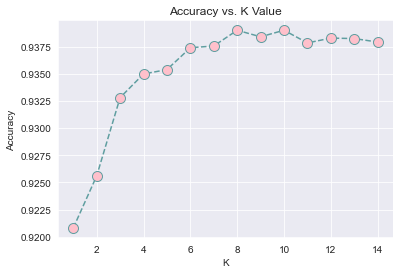

In [83]:
# plot a line chart to better visualize
plt.plot(range(1,15, 1), accuracy, color='cadetblue', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

For the highest accuracy, the best K value should be 8 or 10.

In [84]:
# Set n_neighbors to 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train, target_train.values.ravel())
pred_8 = knn.predict(test).reshape(24838,1)
accuracy_8 = accuracy_score(target_test, pred_8)
accuracy_8


0.9390047507850874

#### Model 3: **XGBoost Classifier**

In [85]:
from xgboost import XGBClassifier

In [86]:
# Convert target value of train and test data to int type with value of 0 and 1
# To better train the model
target_trainxgb = target_train['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
target_testxgb = target_test['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})

In [87]:
# target data after being converted
target_trainxgb

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 101061, dtype: int64

In [88]:
# Create a list record XGB Classifier's accuracy
xgb_acc = []

**The parameters we mainly explore is the "n_estimators", which could decide the complexity level of the model.**

**It is also what we have mainly explored in the Random Forest Classifier case. Due to the relationship of these two algorithms, mainly exploring this parameter will also facilitate later models comparison**

In [89]:
# Try change n_estimators to 25
model =  XGBClassifier (n_estimators = 25)
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
xgb_acc.append(accuracy_xgb)
accuracy_xgb

0.9581689346968355

In [90]:
# Try change n_estimators to 50
model =  XGBClassifier (n_estimators = 50)
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
xgb_acc.append(accuracy_xgb)
accuracy_xgb

0.9630002415653435

In [91]:
# Use default parameters, where n_estimators = 100
model =  XGBClassifier ()
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
xgb_acc.append(accuracy_xgb)
accuracy_xgb

0.9642885900636122

In [92]:
# Try change n_estimators to 150
model =  XGBClassifier (n_estimators = 150)
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
xgb_acc.append(accuracy_xgb)
accuracy_xgb

0.9632820677993397

In [93]:
# Try change n_estimators to 250
model =  XGBClassifier (n_estimators = 250)
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
xgb_acc.append(accuracy_xgb)
accuracy_xgb

0.9624768499879217

In [94]:
# Try change n_estimators to 500
model =  XGBClassifier (n_estimators = 500)
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
xgb_acc.append(accuracy_xgb)
accuracy_xgb

0.9619937193010709

In [95]:
# Try change n_estimators to 1000
model =  XGBClassifier (n_estimators = 1000)
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
xgb_acc.append(accuracy_xgb)
accuracy_xgb

0.9607053708028022

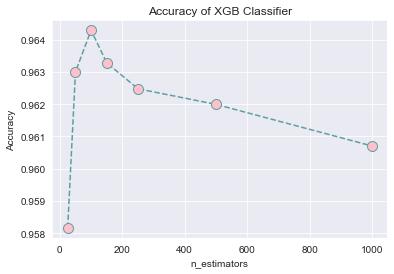

In [96]:
# plot the accuracy changing pattern with the increase of n_estimators
plt.plot([25, 50, 100, 150, 250, 500, 1000], xgb_acc, color='cadetblue', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Accuracy of XGB Classifier')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

We find that when n_estimators >= 100, with the increase of of n_estimators, the accuracy decreases, which is different from the case of Random Forest Classifier.

This may indicate that the complexity of the default XGB Classifier model is enough for our data. Increasing the complexity will cause overfitting issues. 

We also tries to reduce the complexity. We find that when n_estimators is smaller than 100, the accuracy also decreases. 

In [97]:
# Try tuning some other parameters
model =  XGBClassifier (
                        eval_metric = 'rmse',
                        objective='binary:hinge')
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
accuracy_xgb

0.9636041549239069

In [98]:
# Try tuning some other parameters
model =  XGBClassifier (
                        eval_metric = 'logloss',
                        objective='binary:logistic', 
                        max_depth= 10,
                        learning_rate= 0.1 ,
                        gamma= 0.8,
                        reg_lambda=   2 ,
                        reg_alpha=  2 ,
                        scale_pos_weight= 2 ,
                        subsample= 0.8,
                        colsample_bytree=  0.8)
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
accuracy_xgb

0.9601819792253805

It seems like without systematically fine-tuning, it is hard to improve model performance by adjusting these parameters in limited tries.

The accurary result is even higher by applying XGBoost classifier, with an accuray around 96%.

We decide to use the below XGB Classifier, which is with the default parameters.

In [99]:
# train the model again to analyze failed examples later
model =  XGBClassifier ()
xgbclf = model.fit(train, target_trainxgb )
xgb_pred = xgbclf.predict(test)
accuracy_xgb = accuracy_score(target_testxgb, xgb_pred)
accuracy_xgb

0.9642885900636122

##### XGB Classifier failed examples analysis

In [100]:
# XGB predictions
xgb_pred

array([1, 1, 0, ..., 0, 1, 0])

In [101]:
# XGB test target 
target_testxgb.values

array([1, 1, 0, ..., 0, 1, 0])

In [102]:
# find the failed index
index = np.arange(0,24838)
fail_index_xgb = index[xgb_pred != target_testxgb.values]
len(fail_index_xgb)

887

In [103]:
#failed examples in the test data
# features
fail_xgb = test.iloc[fail_index_xgb]
# target values
fail_xgb["target class"] = target_testxgb.iloc[fail_index_xgb]
# predict values
fail_xgb["predict class"] = xgb_pred[fail_index_xgb]

In [104]:
# Observe XGB Classifier failed examples
fail_xgb

,Age,Flight Distance,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,...,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,target class,predict class
4,0.636947,0.056942,-0.386329,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
41,-1.011338,-0.439048,-0.386329,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
52,0.900672,-0.661538,0.061006,0,1,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
102,-0.088298,-0.907905,-0.254760,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
133,-0.022367,-0.633320,2.060855,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25906,-0.945406,-0.143842,0.166261,1,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
25930,-0.615749,1.771743,-0.386329,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
25945,-0.681681,-0.065699,0.139948,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
25960,-1.077269,-0.740766,-0.386329,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [105]:
# fail examples online boarding feature analysis
ob0 = fail_xgb["Online boarding_0"].sum()
ob1 = fail_xgb["Online boarding_1"].sum()
ob2 = fail_xgb["Online boarding_2"].sum()
ob3 = fail_xgb["Online boarding_3"].sum()
ob4 = fail_xgb["Online boarding_4"].sum()
ob5 = fail_xgb["Online boarding_5"].sum()

fail_ob_ct = [ob0,ob1,ob2,ob3,ob4,ob5]




([<matplotlib.patches.Wedge at 0x7f77af25d0a0>,
 [Text(1.0995584640478397, 0.031163827440734822, '0'),
  Text(1.0872675353106194, 0.16688111534733752, '1'),
  Text(0.9656589876263754, 0.5267852689819676, '2'),
  Text(0.3391775514540563, 1.04640268949847, '3'),
  Text(-0.8302799144200772, -0.721550596777932, '4'),
  Text(1.0847942618525244, -0.1822674119304842, '5')],
 [Text(0.5997591622079125, 0.0169984513313099, '0.90%'),
  Text(0.5930550192603378, 0.09102606291672954, '3.04%'),
  Text(0.526723084159841, 0.2873374194447096, '8.00%'),
  Text(0.18500593715675798, 0.5707651033628017, '16.12%'),
  Text(-0.45287995332004205, -0.39357305278796284, '66.63%'),
  Text(0.5917059610104678, -0.09941858832571865, '5.30%')])

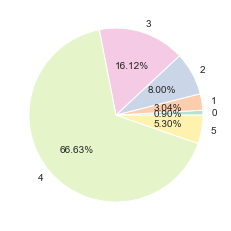

In [106]:
plt.pie(fail_ob_ct, labels = [0,1,2,3,4,5], colors = sns.color_palette("Pastel2"), autopct = '%1.2f%%')

In [107]:
# fail examples Class feature analysis
bus = fail_xgb["Class_Business"].sum()
eco = fail_xgb["Class_Eco"].sum()
ecoplus = fail_xgb["Class_Eco Plus"].sum()

fail_class_ct = [bus,eco,ecoplus]


([<matplotlib.patches.Wedge at 0x7f77ca1b0160>,
 [Text(0.7141706361067941, 0.8366363024174944, 'bus'),
  Text(-0.890833850301062, -0.6453022943999077, 'eco'),
  Text(1.0691733482629802, -0.2585891555423934, 'ecoplus')],
 [Text(0.38954761969461493, 0.456347074045906, '27.51%'),
  Text(-0.4859093728914883, -0.3519830696726769, '64.94%'),
  Text(0.5831854626888983, -0.14104863029585094, '7.55%')])

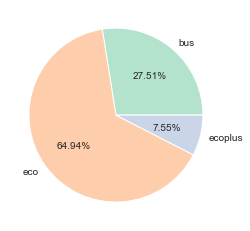

In [108]:
plt.pie(fail_class_ct, labels = ['bus','eco','ecoplus'], colors = sns.color_palette("Pastel2"), autopct = '%1.2f%%')

The percentage of eco class in failed predictions is obviously increases compared to its percentage in the whole dataset.

One possible explaination is the survey data of eco class customersis is more variant than that of business class customers.

Hence, it would be more difficult for the model to predict.


##### Feature Importance of XGB Classifier

Text(0.5, 0, 'Xgboost Feature Importance')

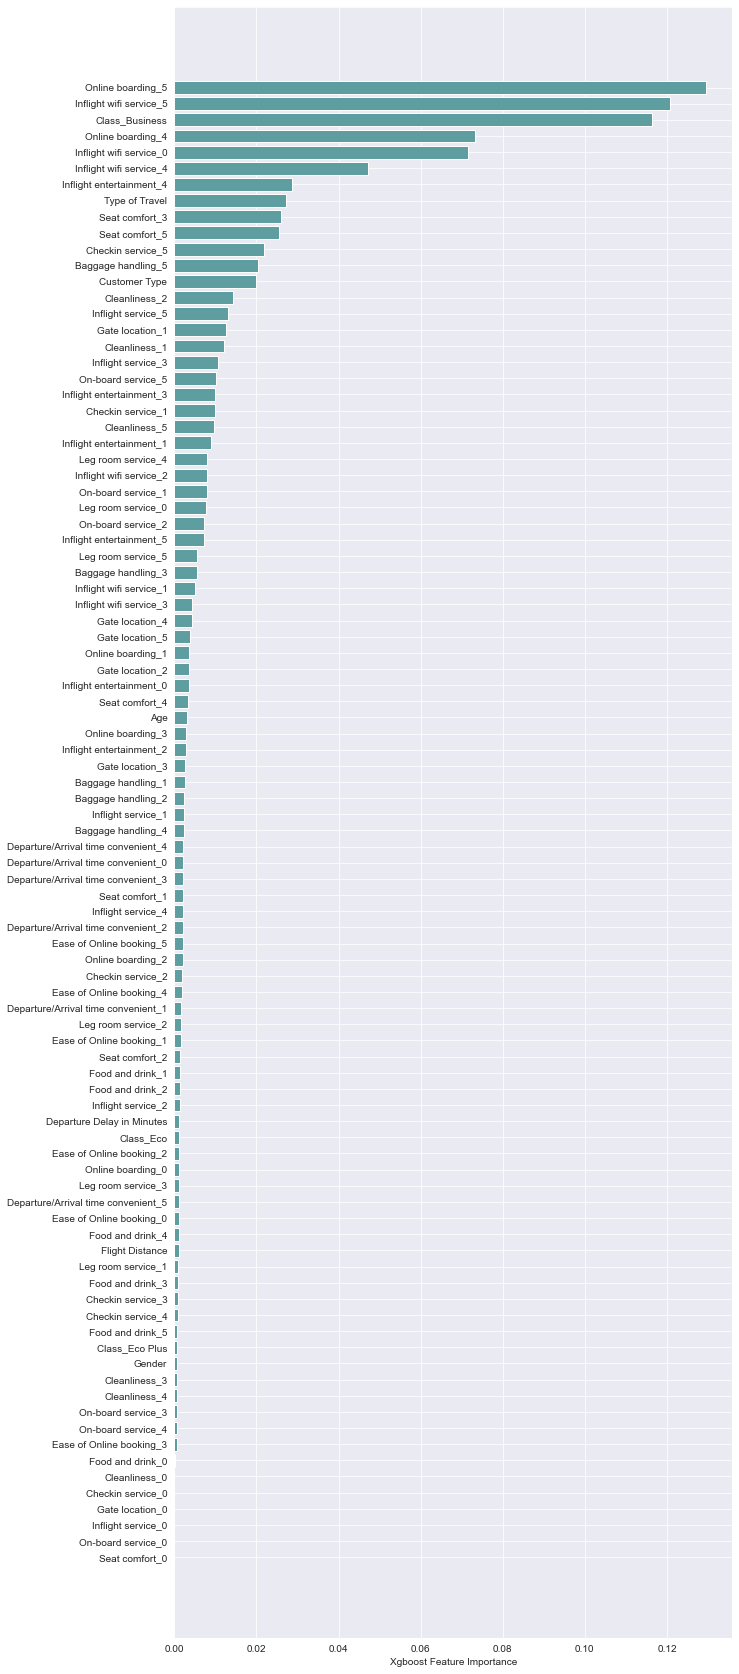

In [109]:
# Plot a bar graph to see the feature importance in descending order
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize = (10,30))
plt.barh(ready_data.columns[sorted_idx], model.feature_importances_[sorted_idx], color = 'cadetblue', )
plt.xlabel("Xgboost Feature Importance")
# Online_boarding rated as 5 shows the highest importance

the "Online Boarding" feature has the most influence relative to other features, with a score around 0.13.

#### Comparison of Models of Best Performance

In [110]:
# Select the model with best performance of each algorithms to form a table
d = {"Random Forest Classifier": ["n_estimators = 1000, random_state = 42", 0.9616313712859328, "1m 18.6s"],
      "KNN": ["n_neighbors = 8 or 10",0.9390047507850874, "43.9s" ],
      "XGB Classifier": ["Default", 0.9642885900636122, "9.9s"]}
# The Runtimes below are just results of one particular run. It would not be exactly the same each time.
# However, each runtime is similar to below data and can indicate the efficiency of each model.
models_comp = pd.DataFrame(data=d)
models_comp.index = ["Parameters", "Accuracy", "Runtime"]
models_comp

,Random Forest Classifier,KNN,XGB Classifier
Parameters,"n_estimators = 1000, random_state = 42",n_neighbors = 8 or 10,Default
Accuracy,0.961631,0.939005,0.964289
Runtime,1m 18.6s,43.9s,9.9s


#### Supervised Learning and Models Conclusion
Considering both accuracy and runtime, XGB Classifier model performs best for this dataset. With far much less estimators and runtime, it still shows higher accuracy that RFC. XGB Classifier shows a significantly high efficiency.

What might accounts for the lower accuracy of Random Forest Classifier relative to XGB:<br>          
 "XGBoost always gives more importance to functional space when reducing the cost of a model while Random Forest tries to give more preferences to hyperparameters to optimize the model. A small change in the hyperparameter will affect almost all trees in the forest which can alter the prediction"(Gupta).

#### Error Analysis: How can we get closer to 100% accuracy?


To reduce error and improve model performance in the future, we will consider below solutions:
1. Use systematically fine-tuning
2. Make data Distribution more balanced
3. Use More advanced model(i.e. linear or nonparametric models with more flexibility) or 
4. Combination of different models
5. Try more appropriate data preprocessing methods, e.g. Drop or filling-in? How to deal with outliers in specific cases?
6. We also need to avoid Overfitting issues while improve the accuracy. In this project, we only used training and testing data. Maybe in the future practice, a separated validation dataset would help to better fix overfitting issues of models. 



#### Conclusion
There are a few worth noticing points:
1. Even loyal customers are more likely to express dissatisfactions or neutral satisfactions.<br>

    --First, it is important for airlines to do more customer relationship maintenance, because brand loyalty is significant for eastablishing a well-standing brand images that promotes more sales in the long term.<br>
    --Second, it also hints a poor overall service quality for long, since loyal customers have had more experiences with the airline. 
      
2. A remarkable disparity in satisfactions Between Business and Leisure Travelers.<br>

    --One significant difference between business and leisure travelers in reality: Business travelers take weekday flights more and leisure travelers take weekend travels more. This implies a heavier service workload for flights with more leisue travelers. Because business travelers are spreaded out in longer weekdays while leisure travelers are more aggreagated in shorter weekends.<br>
    --Thus, it is very necessary to inspect the service procedure for higher efficiency and the sufficiency of staffs to ensure service qualities during weekends.

We are correlating the whole analysis with a theory from consumer behavior field: sequence effect. When people are evaluating their experiences, they are not able to recall all moments of the experience, but only partial impressive ones. Specifically, the evaluation of an experience is based on moments in types of “the trend in the sequence of pain or pleasure, the high and low points, and the ending”(Chase and Dasu). This may also explains the higher dissatisfactions or neutral satisfactions among loyal customers. 

For the ending, baggage handling can be consider as the final step of a passenger’s flight, having an assistant to stand by the baggage claim for services such as carrying luggages and greetings may adds an significant effect on improving the evaluation.


#### Reference
1. Chase, Richard B, and Sriram Dasu. “Want to Perfect Your Company's Service? Use Behavioral Science.” Harvard Business Review, 20 Aug. 2014, hbr.org/2001/06/want-to-perfect-your-companys-service-use-behavioral-science.<br>
2. Gupta, Aman. “XGBoost versus Random Forest.” Medium, Geek Culture, 1 June 2021, medium.com/geekculture/xgboost-versus-random-forest-898e42870f30.<br>
3. Harrison, Onel. “Machine Learning Basics with the K-Nearest Neighbors Algorithm.” Medium, Towards Data Science, 14 July 2019, towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761.<br>
4. “What Is XGBoost?” NVIDIA Data Science Glossary, www.nvidia.com/en-us/glossary/data-science/xgboost/. 

#### Code Reference
1. Boganov Sergei (2022) Airline passenger satisfaction (Part 1) (Version 28) [Source code]. https://www.kaggle.com/code/frixinglife/airline-passenger-satisfaction-part-1<br>

2. Rajeev Nair (2022) Airline satisfaction - XGBoost - 96% accuracy (Version 8) [Source code]. https://www.kaggle.com/code/rajeevnair676/airline-satisfaction-xgboost-96-accuracy